# Итоговая работа.

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
from scipy.optimize import minimize
%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [8]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

a) Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [12]:
from sklearn.metrics import pairwise_distances

for i, vector in enumerate(pairwise_distances(raitings, metric="cosine")):
    print(i, list(vector).index(np.min(vector[np.nonzero(vector)])))

0 8
1 4
2 9
3 9
4 8
5 9
6 3
7 5
8 0
9 2


b) Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [10]:
#Анализ главных компонентов (SVD)

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=5)
svd.fit_transform(raitings)
#print(svd.explained_variance_ratio_)   #Процент отклонения, объясняемый каждым из выбранных компонентов
#print(svd.explained_variance_ratio_.sum()) 
#print(svd.singular_values_) # Сингулярные значения 5 переменных в пространстве меньшей размерности

array([[23.41982063, -5.36092136,  3.83196779, -4.06950174,  1.10267269],
       [24.76774917,  4.52188701,  1.35815965,  1.58128545,  8.59912002],
       [22.27728589, -6.96492049, -4.84461485, -0.47661647,  3.37152266],
       [19.4257757 ,  2.64575227, -6.86014009, -4.76604765,  1.96075707],
       [22.8146354 ,  0.51464093,  7.70180188,  4.42379773,  1.29124163],
       [21.76961656,  1.94294987, -4.56934779,  8.32306487, -2.21887359],
       [21.23427453,  9.78047778,  1.16340271, -4.86074521, -2.60815471],
       [19.97476815,  4.00048677, -1.67456316,  1.1512346 , -3.5637169 ],
       [26.39306998, -3.03090482,  5.86422753, -1.67503491, -3.71500141],
       [29.94016844, -4.82012297, -3.48912415,  0.05527083, -3.62526487]])

## Задание 2

Вычислите производную tg**2(sin(x) + cos(2*x+3)) в точке x_0=1 (на python и на бумаге).

In [12]:
x, y = symbols('x y')
gfg_exp = tan(sin(x) + cos(2*x+3))**2
  
print("Before Differentiation : {}".format(gfg_exp))
  
dif = diff(gfg_exp, x)
  
print("After Differentiation : {}".format(dif))

Before Differentiation : tan(sin(x) + cos(2*x + 3))**2
After Differentiation : 2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))


In [13]:
from scipy.misc import derivative
def f(x):                 
    return tan(sin(x) + cos(2*x + 3))**2
derivative(f, 1, dx=1e-6)

55.3859176433136

На бумаге
f'(1) = 2(-2sin(5) + cos(1))(tan(sin(1) + cos(5))**2 + 1)tan(sin(1) + cos(5))

In [ ]:
## Задание 3
Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error.

In [30]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [31]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [32]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

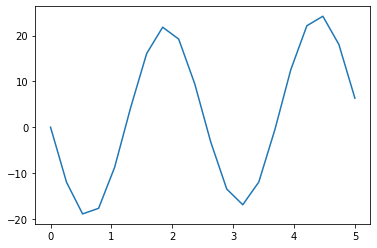

In [33]:
plt.plot(x, fx)
plt.show()

In [34]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [41]:
from scipy.optimize import minimize
minimize(error,[0,0], method= 'COBYLA' )

     fun: 0.0767456611156554
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 135
  status: 1
 success: True
       x: array([ 3.00018796, -2.50008926])

## Задание 4
Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [28]:
a = np.random.randint(0, 100, size = 20)
b = []
c = []
i = 0
while i <= 1000:
    b_ = np.random.choice(a,50)
    b.append(b_)
    c_ = c.append(np.mean(b_))
    i += 1
#print(b)  #1000 выборок размера 50
print(c)  #среднее для каждой выборки
    

[51.68, 52.28, 51.52, 47.52, 51.56, 55.04, 50.42, 52.02, 53.94, 61.94, 47.46, 48.96, 55.14, 54.28, 61.28, 56.16, 50.68, 50.82, 53.12, 46.84, 56.58, 48.64, 53.38, 43.98, 58.68, 59.04, 56.88, 56.06, 51.82, 49.58, 51.5, 55.32, 56.64, 62.74, 56.96, 55.4, 54.7, 54.34, 52.26, 56.6, 47.56, 58.54, 53.3, 56.02, 45.4, 55.98, 58.18, 58.6, 60.36, 59.96, 51.66, 46.28, 52.7, 52.38, 47.46, 62.24, 55.54, 59.78, 53.74, 56.8, 48.98, 60.9, 62.7, 54.32, 55.32, 47.5, 58.5, 52.68, 54.52, 54.24, 50.26, 54.46, 52.52, 56.26, 56.58, 52.9, 55.42, 55.4, 56.42, 51.52, 48.06, 46.22, 56.84, 58.14, 55.54, 50.78, 55.1, 51.76, 52.38, 51.52, 55.74, 49.94, 54.2, 52.82, 57.56, 49.46, 56.42, 52.56, 54.12, 51.24, 57.28, 52.52, 49.9, 56.44, 51.96, 46.88, 50.94, 59.08, 53.12, 55.5, 56.86, 49.5, 49.28, 47.5, 53.04, 45.84, 55.94, 50.28, 54.26, 59.48, 54.4, 50.02, 59.44, 52.34, 49.46, 54.98, 55.28, 54.12, 60.76, 59.0, 48.92, 44.44, 53.24, 51.7, 55.5, 49.74, 50.88, 55.26, 56.38, 55.22, 52.4, 52.86, 45.68, 55.68, 53.98, 48.22, 45.

(array([  9.,  29.,  63., 138., 218., 225., 188.,  89.,  31.,  11.]),
 array([38.02 , 40.572, 43.124, 45.676, 48.228, 50.78 , 53.332, 55.884,
        58.436, 60.988, 63.54 ]),
 <BarContainer object of 10 artists>)

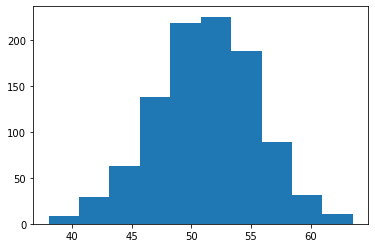

In [27]:
plt.hist(c)

## Задание 5
Найдите собственные значения и собственные вектора матрицы (на python и на бумаге).

In [10]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


w - Собственные числа входной матрицы.

v - Собственные векторы входной матрицы.

In [11]:
w, v = np.linalg.eig(m)
print(w)
print()
print(v)

[ 3. -1.]

[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]
